In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Genesis/OneDrive/Desktop/Projects/Time_Series_Forecasting/Dataset/Dataset.csv')
df

,Date,Actual,Goal
0,May 31 2022,0,8000
1,Jun 1 2022,0,8000
2,Jun 2 2022,0,8000
3,Jun 3 2022,1102,8000
4,Jun 4 2022,1254,8000
...,...,...,...
415,Jul 20 2023,8393,6500
416,Jul 21 2023,5954,6500
417,Jul 22 2023,9550,6500
418,Jul 23 2023,5157,6500


In [5]:
##Check the datatype of date column as we are dealing with Time series data
df['Date'].dtype

dtype('O')

In [8]:
##Changing the data type of date column from object to datetime 
df['Date'] = pd.to_datetime(df['Date'])
print(df)

          Date  Actual  Goal
0   2022-05-31       0  8000
1   2022-06-01       0  8000
2   2022-06-02       0  8000
3   2022-06-03    1102  8000
4   2022-06-04    1254  8000
..         ...     ...   ...
415 2023-07-20    8393  6500
416 2023-07-21    5954  6500
417 2023-07-22    9550  6500
418 2023-07-23    5157  6500
419 2023-07-24    8923  6500

[420 rows x 3 columns]


In [19]:
df.set_index("Date",inplace=True)
df

,Actual,Goal
Date,,
2022-05-31,0,8000
2022-06-01,0,8000
2022-06-02,0,8000
2022-06-03,1102,8000
2022-06-04,1254,8000
...,...,...
2023-07-20,8393,6500
2023-07-21,5954,6500
2023-07-22,9550,6500


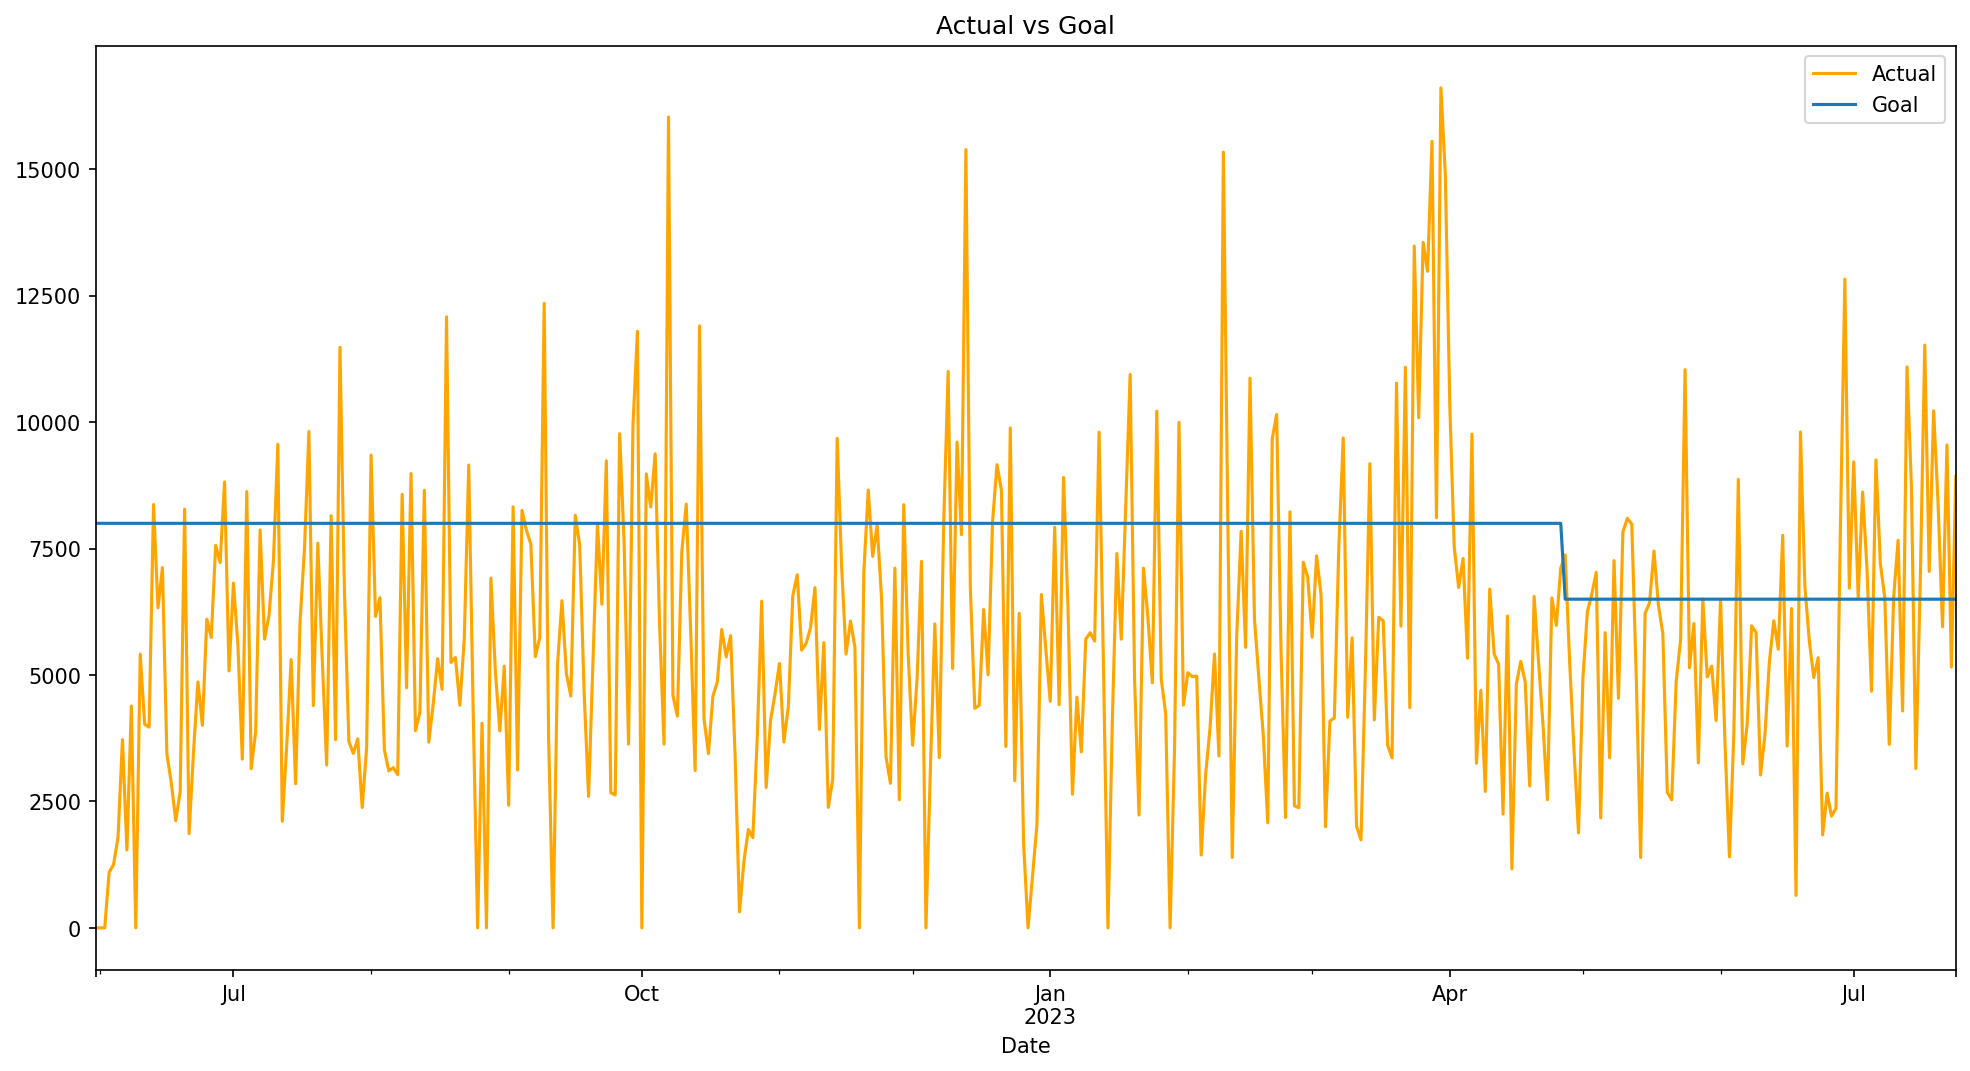

In [22]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df['Actual'].plot(label='Actual', color='orange')
df['Goal'].plot(label='Goal')

# adding title to the plot
plt.title('Actual vs Goal')

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()
